In [136]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [54]:
import pandas as pd

In [113]:
# 데이터 불러오기
test_taste = pd.read_csv("/test_taste.csv")
test_delivery = pd.read_csv("/test_delivery.csv")
test_quantity = pd.read_csv("/test_quantity.csv")

In [133]:
test_taste['taste'].value_counts()/len(test_taste) # Taste 레이블 분포

5    0.860837
4    0.100885
3    0.024498
1    0.007571
2    0.006210
Name: taste, dtype: float64

In [134]:
test_delivery['delivery'].value_counts()/len(test_delivery) # Delivery 레이블 분포

5    0.804394
4    0.083659
1    0.050256
3    0.043033
2    0.018658
Name: delivery, dtype: float64

In [135]:
test_quantity['quantity'].value_counts()/len(test_quantity) # Quantity 레이블 분포

5    0.813936
4    0.102603
3    0.051302
2    0.017611
1    0.014548
Name: quantity, dtype: float64

### Taste

Accuracy: 0.8715 <br>
Recall: 0.8715 <br>
Precision: 0.9343 <br>
F1 : 0.8985 <br>
Test took: 0:01:04 <br>

In [115]:
with open("taste_bert_label.txt", "rb") as fp:
	taste_label = pickle.load(fp)
with open("taste_bert_pred.txt", "rb") as fp:
	taste_pred = pickle.load(fp)

In [116]:
taste_label = [label+1 for label in taste_label]
taste_pred = [label+1 for label in taste_pred]

In [117]:
confusion_matrix(taste_label,taste_pred)

array([[  46,    6,   18,    6,   13],
       [  23,    7,   20,   15,    8],
       [  17,   10,   72,   71,  118],
       [   4,    1,   33,  190,  958],
       [   5,    2,   16,  167, 9930]])

In [143]:
print(classification_report(taste_pred, taste_label, target_names=('1','2','3','4','5')))

              precision    recall  f1-score   support

           1       0.52      0.48      0.50        95
           2       0.10      0.27      0.14        26
           3       0.25      0.45      0.32       159
           4       0.16      0.42      0.23       449
           5       0.98      0.90      0.94     11027

    accuracy                           0.87     11756
   macro avg       0.40      0.51      0.43     11756
weighted avg       0.93      0.87      0.90     11756



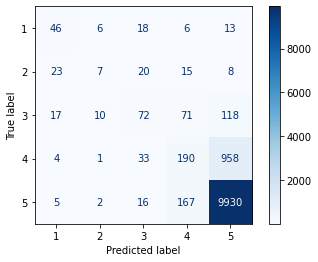

In [147]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(taste_label,taste_pred), display_labels=list(set(taste_label)))
disp.plot(cmap='Blues')

In [119]:
test_taste['taste_pred'] = taste_pred

In [120]:
for i in range(test_taste.shape[0]):
	if int(test_taste['taste'][i]) != int(test_taste['taste_pred'][i]):
		print(f"taste_label : {test_taste['taste'][i]} - taste_pred : {test_taste['taste_pred'][i]} - text : {test_taste['text'][i]} ")

taste_label : 4 - taste_pred : 5 - text : 맛있어요! 양도 많음 
taste_label : 4 - taste_pred : 5 - text : 맛있게 잘 먹었습니다^^ 
taste_label : 5 - taste_pred : 3 - text : 존맛탱 갈비 천왕 맛있어요 
taste_label : 4 - taste_pred : 5 - text : 맛있게 잘 먹었습니다 
taste_label : 5 - taste_pred : 4 - text : 너무 맛있었어요 메추리알 정말 좋았어욥! 
taste_label : 4 - taste_pred : 5 - text : 배달 겁나빠르고 핫 소스 맛나요! 
taste_label : 4 - taste_pred : 5 - text : 맛나요 왕~~~~~~ 
taste_label : 4 - taste_pred : 5 - text : 리뷰 보고 주문했어요. 국물 닭발이 매콤하고 맛있긴 한데 뭔가 특유한 향이 있는 고 같아요. 약간 약초? 한약? 잡내 때문에 육수를 따로 만드시는 건지 그 특유의 향 때문에 저는 맛이 살짝 아쉬웠어요 차라리 국물 닭발보다는 일반 닭발이 더 맛있을 거 같아요. 
taste_label : 1 - taste_pred : 5 - text : 철 수세미가 나왔네요....... 맛있으면 뭐 합니까...... 이런 것도 신경 안 쓰시는데..... 
taste_label : 5 - taste_pred : 1 - text : 아깐 칼칼한 제육에 살이 도톰한 돈까스~~~넘 맛나고 배불려요. 담에 또 시키고 싶은 맛이에요. 적극 강추요~~~^ 
taste_label : 4 - taste_pred : 5 - text : 정말 맛있게 뚝딱했네요^^ 근데 양 좀 더 주세요~~ 
taste_label : 5 - taste_pred : 4 - text : 여러 가지 반찬도 많이 오고 맛있게 먹었습니다. 
taste_label : 3 - taste_pred : 5 - text : 저번에 먹었을 때는 

In [ ]:
# 틀렸지만 유의미한 리뷰들
taste_label : 1 - taste_pred : 5 - text : 배달이 진짜 너무 늦지만 기다린 만큼 맛은 있네요 
taste_label : 4 - taste_pred : 5 - text : 맛있게 먹었어요!! 중간맛시컀는데 좀 안 매워서 담에는 매운맛으로 시켜야겠어요 
taste_label : 5 - taste_pred : 3 - text : 이게 무슨 피자죠. 맛이나 양은 그렇다 치고 배달이 문젠지 잘못 만든 건지... 
taste_label : 4 - taste_pred : 5 - text : 국물이 좀 부족해서 졸아서 오긴 했는데 맛있었어요! 
taste_label : 4 - taste_pred : 3 - text : 돈가스고 크고 맛있었는데 고기가 살짝 덜 익어서 온 게 있었네요 
taste_label : 4 - taste_pred : 5 - text : 프라이드는 bbq 양념은 추억의 어린이 맛이 그대로네요 
taste_label : 3 - taste_pred : 5 - text : 맛 양 괜찮습니다 주먹밥도 주시고 맛나게 
taste_label : 5 - taste_pred : 3 - text : 살짝 느끼하긴 한데 맛있습니다~~ 
taste_label : 3 - taste_pred : 4 - text : 맛있어요. 배달도 빠르고 좋아요. 근데 짜장면 면은 별로입니다. 땡글땡글한 맛은 없어요. 
taste_label : 3 - taste_pred : 5 - text : 그때그때 맛이 달라지는듯한 기분이지만 짬뽕은 항상 맛있어요! 제가 짬뽕 마니아라 좋아요 
taste_label : 5 - taste_pred : 4 - text : 제가 ,, 계란찜 누른 줄 알았는데 공깃밥 눌러갖고 공깃밥이 총 세 그릇 왔는데 세 그릇 다 먹었습니다 ,, 맛있습니다 김치찌개,, 
taste_label : 3 - taste_pred : 1 - text : 전 오리지널이 더 맛있는 걸로.... 
taste_label : 5 - taste_pred : 3 - text : 살짝 양념치킨이 짰는데 다 맛있네요 
taste_label : 2 - taste_pred : 4 - text : 그냥 뭐 특별하게 맛있는 건 못 느낌 
taste_label : 5 - taste_pred : 3 - text : 맛있는데 매운맛 시켰더니 너무 맵더라고요 ㅠㅠ담엔 보통맛 시켜야겠어요!! 

### Delivery

Accuracy: 0.8525 <br>
Recall: 0.8525 <br>
Precision: 0.9082 <br>
F1 : 0.8766 <br>
Test took: 0:00:23 <br>

In [121]:
with open("delivery_bert_label.txt", "rb") as fp:
	delivery_label = pickle.load(fp)
with open("delivery_bert_pred.txt", "rb") as fp:
	delivery_pred = pickle.load(fp)

In [122]:
delivery_label = [label+1 for label in delivery_label]
delivery_pred = [label+1 for label in delivery_pred]

In [144]:
print(classification_report(delivery_pred, delivery_label, target_names=('1','2','3','4','5')))

              precision    recall  f1-score   support

           1       0.83      0.60      0.70       232
           2       0.00      0.00      0.00         0
           3       0.35      0.35      0.35       143
           4       0.16      0.40      0.23       113
           5       0.97      0.92      0.94      2835

    accuracy                           0.85      3323
   macro avg       0.46      0.45      0.44      3323
weighted avg       0.91      0.85      0.88      3323



/home/fakenews/anaconda3/envs/fakenews/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fakenews/anaconda3/envs/fakenews/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fakenews/anaconda3/envs/fakenews/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [123]:
confusion_matrix(delivery_label,delivery_pred)

array([[ 139,    0,   16,    2,   10],
       [  22,    0,   24,    8,    8],
       [  32,    0,   50,   29,   32],
       [  16,    0,   31,   45,  186],
       [  23,    0,   22,   29, 2599]])

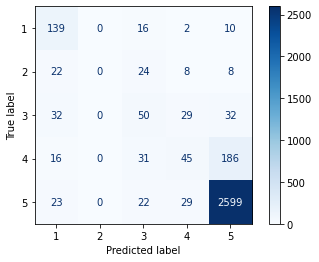

In [124]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(delivery_label,delivery_pred), display_labels=list(set(delivery_label)))
disp.plot(cmap='Blues')

In [125]:
test_delivery['delivery_pred'] = delivery_pred

In [126]:
for i in range(test_delivery.shape[0]):
	if int(test_delivery['delivery'][i]) != int(test_delivery['delivery_pred'][i]):
		print(f"delivery_label : {test_delivery['delivery'][i]} - delivery_pred : {test_delivery['delivery_pred'][i]} - text : {test_delivery['text'][i]} ")

delivery_label : 5 - delivery_pred : 3 - text : 새벽에 출출할 때 자주 시켜 먹은 집입니다. 정말 맛도 5성급 호텔 중식 못지않게 맛있는데 가격은 말도 안 되게 저렴하며 양도 풍부하게 주고 구성비 갑입니다. 쿠폰도 주는데 배달비는 공짜이기까지... 그냥 여기서 시켜 먹으세요 안 시켜 먹으면 바보 
delivery_label : 5 - delivery_pred : 3 - text : 맛있게 잘 먹었습니다! 배달 빨랐어요 ㅎㅎ 
delivery_label : 4 - delivery_pred : 5 - text : 양도 괜찮고 배달도 생각보다 안 늦게 왔습니다 잘 먹었습니다 
delivery_label : 3 - delivery_pred : 5 - text : 제가 원래 후하거든요.. 웬만하면 이해하고 어려운 시국에 좋게 생각하려 보는 데... 다른 배달 앱에서도 맥도날드 잘 시켜 먹는 데.. 평점 낮게 주는 분들 왜 그러냐? 싶었는데... 오늘 제가 찍혔네요... 아무리 추워도... 이런 적 없었는데... 다식 어서 미지근도 찾을 수 없었고.. 심지어 종이 백도 달랑 한 장에 오픈되어있고.. 빵은 납작 찌그러져서 이게 버거를 먹는 건지 3일 된 냉장고에서 나온 햄버거를 먹는 건지.. 편의점도 이것보단 훨씬 낫죠. 정말 실망! 신제품 시켜 먹었던 헐.... 소스 어딨어요? 샤워 소스만. 가득.. 다 버림. 
delivery_label : 5 - delivery_pred : 1 - text : 먹다가 찍음 이제 피자는 여기서만 시켜 먹어요. 배달하는 분도 너무 좋았고요 불고기 스파게티가 첨엔 낯설었는데 먹다 보니 맛났어요 굳굳 또 먹을게요 빠 잉~~~ 
delivery_label : 5 - delivery_pred : 4 - text : 깔끔하고 배달 빨라서 좋아요 
delivery_label : 1 - delivery_pred : 5 - text : 건물 할증이라고 배달료 2천 그 자리에서 받아 갔는데 매장에 전화했더니 공지가 

In [ ]:
# 틀렸지만 유의미한 리뷰들
delivery_label : 3 - delivery_pred : 4 - text : 배달이 좀 걸리지만 맛있어요 
delivery_label : 2 - delivery_pred : 3 - text : 맛있게 잘 먹었습니다. 배달이 잘못 오고 또 늦게 와서.... 좀 아쉬웠지만 치킨은 맛있네요 ㅎㅎ 
delivery_label : 5 - delivery_pred : 3 - text : 배달이 좀 걸리네요.. 잘 먹었습니다 
delivery_label : 4 - delivery_pred : 5 - text : 배달도 빠르고 먹을만했습니다. 
delivery_label : 1 - delivery_pred : 3 - text : 다 식고 콜라 김빠짐 배달 너무 늦음 
delivery_label : 5 - delivery_pred : 4 - text : 배달 실수로 사이다를 빠뜨리셔서 다시 다녀오셨는데 배달하신 분이 친절하셔서 기분 나쁘진 않았어요 
delivery_label : 4 - delivery_pred : 1 - text : 잘못 배달 왔는데 다시 갖다 줬네요 
delivery_label : 2 - delivery_pred : 1 - text : 우리가 아는 롯데리아 맛 배달 느렸음 
delivery_label : 1 - delivery_pred : 3 - text : 매번 식어 오네요 배달을 들러들러 오시는지 
delivery_label : 4 - delivery_pred : 5 - text : 배달 후 문자 달라 남겼는데 전화가 와서 아쉬웠어요 요청사항도 잘 들어주시고 너무 만족했습니다^^트러플 소스 많이 달랬는데 듬뿍 주셨어요 굿!!! 
delivery_label : 3 - delivery_pred : 1 - text : 배달이 조금 느린 거 빼곤 좋아요 
delivery_label : 4 - delivery_pred : 5 - text : 와 빨리 배달 오고 맛도 너무 좋아요 
delivery_label : 3 - delivery_pred : 1 - text : 맛은 좋은데 배달이 너무 오래 걸리네요ㅠ주문이 많아 그렇겠죠? 
delivery_label : 4 - delivery_pred : 5 - text : 배달은 한 20-25분쯤 걸린 듯,,? 생각보다 일찍 도착~몇 달 전에 전단지로 한번 시켜 먹고 앱에 떠서 오래간만에 시켰는데, 기본 돈가스가 천 원 정도 오른 듯하더라고요 -아쉬운 점은, 수프가 너무 식고 밍밍~ 김치 있는 건 좋았는데 맛이 그다지;; 근데 메인인 가스들은 다 괜찮았습니다! 옛날 돈가스 맛에 생선가스도 괜찮았고요 

### Quantity

Accuracy: 0.8358 <br>
Recall: 0.8358 <br> 
Precision: 0.8705 <br>
F1 : 0.8513 <br>
Test took: 0:00:20 <br>

In [127]:
with open("quantity_bert_label.txt", "rb") as fp:
	quantity_label = pickle.load(fp)
with open("quantity_bert_pred.txt", "rb") as fp:
	quantity_pred = pickle.load(fp)

In [128]:
quantity_label = [label+1 for label in quantity_label]
quantity_pred = [label+1 for label in quantity_pred]

In [145]:
print(classification_report(quantity_pred, quantity_label, target_names=('1','2','3','4','5')))

              precision    recall  f1-score   support

           1       0.53      0.48      0.50        42
           2       0.11      0.45      0.18        11
           3       0.31      0.39      0.35       108
           4       0.28      0.37      0.32       201
           5       0.96      0.91      0.93      2250

    accuracy                           0.84      2612
   macro avg       0.44      0.52      0.45      2612
weighted avg       0.87      0.84      0.85      2612



In [129]:
confusion_matrix(quantity_label,quantity_pred)

array([[  20,    1,    7,    4,    6],
       [   7,    5,   17,   11,    6],
       [   6,    3,   42,   49,   34],
       [   2,    2,   28,   74,  162],
       [   7,    0,   14,   63, 2042]])

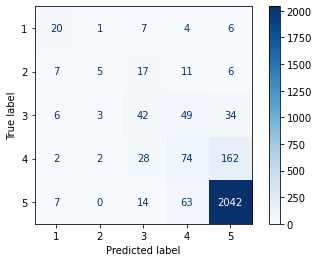

In [130]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(quantity_label,quantity_pred), display_labels=list(set(quantity_label)))
disp.plot(cmap='Blues')

In [131]:
test_quantity['quantity_pred'] = quantity_pred

In [132]:
for i in range(test_quantity.shape[0]):
	if int(test_quantity['quantity'][i]) != int(test_quantity['quantity_pred'][i]):
		print(f"quantity_label : {test_quantity['quantity'][i]} - quantity_pred : {test_quantity['quantity_pred'][i]} - text : {test_quantity['text'][i]} ")

quantity_label : 4 - quantity_pred : 5 - text : 첨 시켜보는 거라 대략 1시간 정도 예상했는데 30분 안에 오더라고요 양이 좀 적어 아싑긴 한데 맛은 달거나 맵거나가 아닌 제 입에 딱 맞는 음식이 어서 생각나면 재주문 할 생각입니다 
quantity_label : 5 - quantity_pred : 4 - text : 양은 많았고요. 육회비빔밥은 고기가 굉장히 질겨서 씹다가 삼킬 수가 없었어요.. 김치찌개는 슴슴했고요. 계란말이도 슴슴했고요. 
quantity_label : 4 - quantity_pred : 5 - text : 밥 양만 좀 많으면 퍼펙트 배달도 빨라요 
quantity_label : 3 - quantity_pred : 5 - text : 한강에서 다 같이 시켜 먹었는데 양도 많고 맛있어요 ㅎ 
quantity_label : 3 - quantity_pred : 5 - text : 자주 시켜 먹는데. 치킨 양이 요즘 들어 많이 적어졌네요. 그래도 맛나요 
quantity_label : 3 - quantity_pred : 5 - text : 맛있네요. 양이 조금 적은듯하나 맛있습니다. 
quantity_label : 4 - quantity_pred : 5 - text : 매번 시켜 먹는데 오늘은 쟁반국수 양도 약간 적었고 양념소스도 너무 적게 왔네요 맛있게 먹긴 했습니다 
quantity_label : 3 - quantity_pred : 5 - text : 기대 이상... 아니 진짜 맛있네요...찜닭...단짠단짠...크... 양이 조금 아쉽지만... 충분히 맛을 즐길 수 있네요... 다음에는 2인분으로 시켜야 할 듯... 배달도 생각보다 빨리 오셔서 순간 당황... 암튼 엄지... 척! 
quantity_label : 5 - quantity_pred : 3 - text : 진짜 배달이 너무 빨리 와서 놀라고, 음식 받았는데 양이 많아서 두 번 놀랐네요~ 평점 좋은 이유가 다 있네요. 건더기 내용물도 많고 진짜 

In [ ]:
# 틀렸지만 유의미한 리뷰들
quantity_label : 3 - quantity_pred : 1 - text : 짬뽕은 맛있지만, 양이 조금 부족합니다. 
quantity_label : 3 - quantity_pred : 4 - text : 오또케 너무 마싯자낭그래서 양이 부족해썽ㅠㅠ 
quantity_label : 3 - quantity_pred : 4 - text : 앞발이랑 막국수를 시켰는데 음식이 전체적으로 너무 달아요 ㅠㅠ막국수는 양이 너무 적고 소스도 너무 달더라고요 ㅠㅠ그래도 주먹밥이 사이드 메뉴로 오는 건 좋았어요! 
quantity_label : 3 - quantity_pred : 4 - text : 맛있게 잘 먹었습니다 양은 조금 부족했어요 
quantity_label : 3 - quantity_pred : 4 - text : 배달 잘 안 시켜 먹는데 맛있어서 또 시켜요 족발 양이... ㅠㅎ
quantity_label : 2 - quantity_pred : 1 - text : 맛은 그럭저럭. 양은 흐 으음...... 배달은 빠름. 
quantity_label : 2 - quantity_pred : 4 - text : 맛있어요 오늘은 양이 좀 적은듯하지만 느낌일 수도 있지만 그래도 맛있어요 
quantity_label : 2 - quantity_pred : 3 - text : 대짜리 시킸는데.. 양도 너무 적고 젓가락도 2개밖이 안 주시고.... 
quantity_label : 5 - quantity_pred : 3 - text : 매콤하니 맛있어 요족발 양이 좀 적긴 한데ᅮ다른 집어먹을 게 많아서 좋아요 쟁반국수도 맛있어요 ᄒᄒ 